In [1]:
from fastai2.vision.all import *
path = untar_data(URLs.PETS)

In [2]:
Path.BASE_PATH = path

In [3]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [4]:
(path/'images').ls()

(#7393) [Path('images/pomeranian_81.jpg'),Path('images/British_Shorthair_56.jpg'),Path('images/japanese_chin_102.jpg'),Path('images/scottish_terrier_76.jpg'),Path('images/British_Shorthair_98.jpg'),Path('images/wheaten_terrier_21.jpg'),Path('images/scottish_terrier_102.jpg'),Path('images/British_Shorthair_266.jpg'),Path('images/yorkshire_terrier_44.jpg'),Path('images/Bengal_60.jpg')...]

In [5]:
fname = (path/'images').ls()[0]

In [6]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['pomeranian']

In [7]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms = Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls= pets.dataloaders(path/'images')

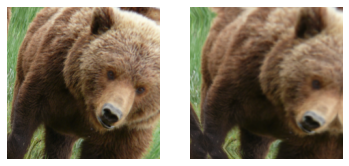

In [8]:
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))
dls1 = dblock1.dataloaders([(Path.cwd()/'images'/'grizzly.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);

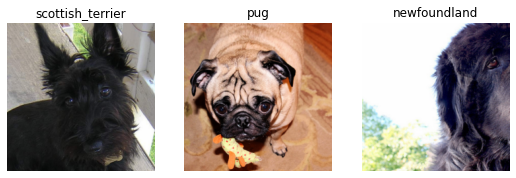

In [9]:
dls.show_batch(nrows=1, ncols=3)

In [10]:
#pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
#                 get_items=get_image_files, 
#                 splitter=RandomSplitter(seed=42),
#                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
#pets1.summary(path/"images")

In [11]:
#from fastai2.callback.fp16 import *
learn = cnn_learner(dls, resnet34, metrics=error_rate)
#learn.fine_tune(2)

In [12]:
x,y = dls.one_batch()
y

TensorCategory([ 7,  2,  0, 33, 23,  5,  8, 25, 13, 33, 18, 23,  6,  9, 24, 26, 27, 28,
         1, 33, 17, 15, 24, 33, 20, 33, 33, 12,  3, 32, 30,  3, 14, 15, 29, 13,
         9, 36,  4,  2, 21, 19,  1, 18, 33, 29, 29, 11, 23,  8, 23,  6,  0,  6,
        17, 14,  6, 20, 35, 21,  1,  5, 35,  6])

In [13]:
preds,_=learn.get_preds(dl=[(x,y)])
preds[0]

tensor([1.2179e-05, 3.9822e-04, 1.9079e-02, 2.0658e-01, 1.2813e-06, 3.6554e-03,
        2.3242e-06, 8.3183e-08, 2.3295e-02, 1.0012e-05, 9.7801e-05, 1.2829e-05,
        9.8155e-04, 2.4567e-06, 8.1205e-05, 1.0126e-04, 1.4126e-02, 2.7859e-05,
        2.4412e-01, 4.2200e-02, 9.7361e-08, 5.9033e-09, 1.4562e-03, 6.9354e-02,
        3.0237e-08, 3.5511e-06, 1.3344e-01, 3.8699e-02, 8.7436e-04, 1.7462e-05,
        6.9150e-02, 8.9666e-03, 8.1868e-02, 2.0587e-04, 7.9796e-05, 4.1111e-02,
        2.1808e-08])

In [14]:
len(preds[0]),preds[0].sum()

(37, tensor(1.))

In [15]:
plot_function(torch.sigmoid, min=-4, max=4)

NameError: name 'plot_function' is not defined

In [ ]:
torch.random.manual_seed(42)

In [16]:
acts = torch.randn((6,2))*2
acts

tensor([[-0.8438,  1.7201],
        [ 1.9556, -2.2004],
        [-1.7762,  1.0682],
        [-0.5589, -0.9728],
        [-1.7845, -0.8438],
        [-2.5866, -0.7763]])

In [17]:
acts.sigmoid()

tensor([[0.3007, 0.8481],
        [0.8761, 0.0997],
        [0.1448, 0.7442],
        [0.3638, 0.2743],
        [0.1438, 0.3007],
        [0.0700, 0.3151]])

In [18]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.0715, 0.9846, 0.0550, 0.6020, 0.2808, 0.1406])

In [19]:
(acts[:,1]-acts[:,0]).sigmoid()

tensor([0.9285, 0.0154, 0.9450, 0.3980, 0.7192, 0.8594])

In [20]:
sm_acts=torch.softmax(acts,dim=1)
sm_acts

tensor([[0.0715, 0.9285],
        [0.9846, 0.0154],
        [0.0550, 0.9450],
        [0.6020, 0.3980],
        [0.2808, 0.7192],
        [0.1406, 0.8594]])

In [21]:
targ = tensor([0,1,0,1,1,0])

In [22]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.0715, 0.0154, 0.0550, 0.3980, 0.7192, 0.1406])

In [23]:
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['loss'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

3,7,targ,idx,loss
0.071499,0.928501,0,0,0.071499
0.984572,0.015428,1,1,0.015428
0.054971,0.945029,0,2,0.054971
0.602018,0.397982,1,3,0.397982
0.280769,0.719231,1,4,0.719231
0.140600,0.859400,0,5,0.140600


In [24]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.0715, -0.0154, -0.0550, -0.3980, -0.7192, -0.1406])

In [25]:
plot_function(torch.log, min=0,max=4)

NameError: name 'plot_function' is not defined

In [26]:
loss_func = nn.CrossEntropyLoss()

In [27]:
loss_func(acts, targ)

tensor(2.1539)

In [28]:
F.cross_entropy(acts, targ)

tensor(2.1539)

In [29]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([2.6381, 4.1716, 2.9010, 0.9213, 0.3296, 1.9618])

In [30]:
interp = ClassificationInterpretation.from_learner(learn)

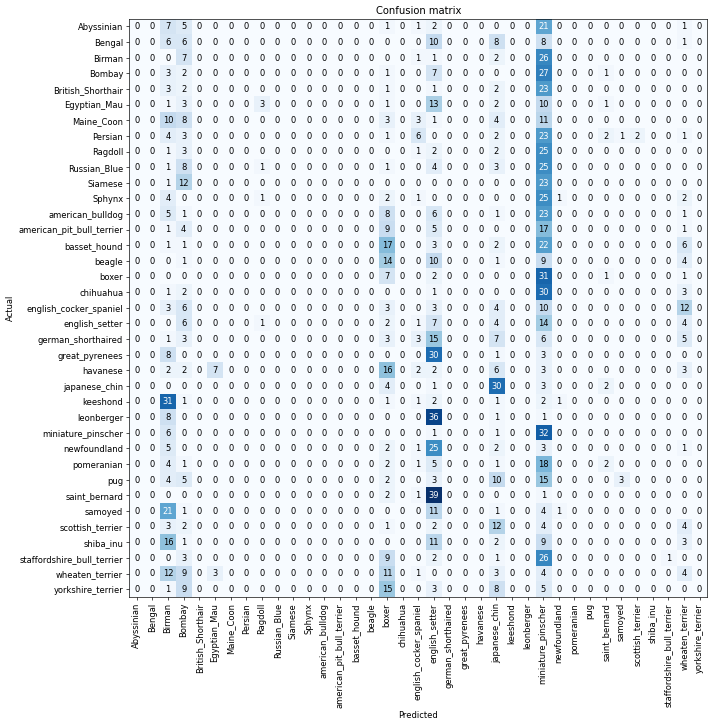

In [31]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [32]:
interp.most_confused(min_val=5)

[('saint_bernard', 'english_setter', 39),
 ('leonberger', 'english_setter', 36),
 ('boxer', 'miniature_pinscher', 31),
 ('keeshond', 'Birman', 31),
 ('chihuahua', 'miniature_pinscher', 30),
 ('great_pyrenees', 'english_setter', 30),
 ('Bombay', 'miniature_pinscher', 27),
 ('Birman', 'miniature_pinscher', 26),
 ('staffordshire_bull_terrier', 'miniature_pinscher', 26),
 ('Ragdoll', 'miniature_pinscher', 25),
 ('Russian_Blue', 'miniature_pinscher', 25),
 ('Sphynx', 'miniature_pinscher', 25),
 ('newfoundland', 'english_setter', 25),
 ('British_Shorthair', 'miniature_pinscher', 23),
 ('Persian', 'miniature_pinscher', 23),
 ('Siamese', 'miniature_pinscher', 23),
 ('american_bulldog', 'miniature_pinscher', 23),
 ('basset_hound', 'miniature_pinscher', 22),
 ('Abyssinian', 'miniature_pinscher', 21),
 ('samoyed', 'Birman', 21),
 ('pomeranian', 'miniature_pinscher', 18),
 ('american_pit_bull_terrier', 'miniature_pinscher', 17),
 ('basset_hound', 'boxer', 17),
 ('havanese', 'boxer', 16),
 ('shiba_

In [33]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.603780,5.468368,0.495940,19:55


epoch,train_loss,valid_loss,error_rate,time
0,3.538791,2.327910,0.628552,27:23


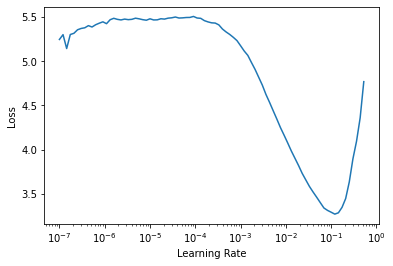

In [36]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
lr_min, lr_steep = learn.lr_find()

In [ ]:
print("Minimum/10:{lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [37]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2, base_lr=2e-2)

epoch,train_loss,valid_loss,error_rate,time
0,1.155072,0.708104,0.167118,12:08


epoch,train_loss,valid_loss,error_rate,time
0,1.380641,1.776903,0.343031,16:30
1,0.750700,0.418328,0.135318,16:29


In [38]:
learn.fine_tune??

In [40]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fit_one_cycle(3, 2e-2)

epoch,train_loss,valid_loss,error_rate,time
0,1.594434,3.447820,0.471583,12:27
1,1.114589,0.568843,0.163735,12:27
2,0.633554,0.385640,0.120433,12:26


In [41]:
learn.unfreeze()

SuggestedLRs(lr_min=1.2022644114040304e-06, lr_steep=7.585775847473997e-07)

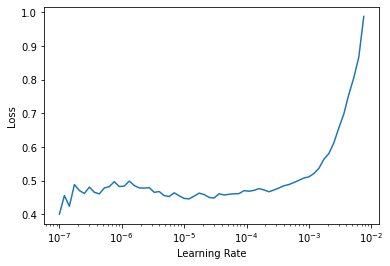

In [42]:
learn.lr_find()

In [43]:
learn.fit_one_cycle(6, lr_max=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.486885,0.374003,0.113667,16:48
1,0.465353,0.402210,0.120433,16:55
2,0.386889,0.328327,0.097429,16:54
3,0.295841,0.291610,0.088633,16:55
4,0.243851,0.281571,0.091340,16:59
5,0.210056,0.276298,0.088633,16:51


In [44]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fit_one_cycle(3, 2e-2)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-4, 2e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.765567,3.659594,0.577131,12:29
1,1.097863,0.523558,0.152909,12:25
2,0.606218,0.369908,0.112314,12:25


epoch,train_loss,valid_loss,error_rate,time
0,0.556469,0.585654,0.169824,16:46
1,1.015027,1.250251,0.343031,16:41
2,0.995462,1.102732,0.294993,16:43
3,0.933225,1.097715,0.313261,16:44
4,0.813062,0.935895,0.276049,16:46
5,0.685706,0.872292,0.258457,16:44
6,0.544548,0.618374,0.177943,16:41
7,0.412234,0.525414,0.168471,16:44
8,0.294081,0.410971,0.122463,16:43
9,0.193061,0.325873,0.097429,16:44


In [ ]:
learn.recorder.plot_loss()

In [ ]:
from fastai2.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)